<a href="https://colab.research.google.com/github/mariachurches/PythonIA/blob/main/WhitePapers/01MIAR_ACT_WhitePapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/mariachurches/PythonIA/blob/main/img/viu_logo.png?raw=1" width="200">

#**01MIAR - Actividad Whitepapers - María Iglesias Veiga**




## Indice:


1.   
Artículo 01 - The NumPy array: a structure for efficient numerical computation

  1.1 Actividad 01.01 - Ampliar dicha explicación, aportando posibles restricciones o limitaciones a dicho sistema y ejemplos propios de los casos de uso.

  1.2 Actividad 01.02 - Verificar la eficacia y mejora posible de rendimiento del uso de dicha técnica sobre ndarrays de tamaños grandes.


2.   Artículo 02 - Data Structures for Statistical Computing in Python

  2.1 Actividad 02.01 - Desarrollar una opinión razonada del estado actual de las herramientas de análisis de datos estadísticos en contraposición a como se muestran en el artículo, R vs Python vs SQL vs Others...



**Librerias necesarias para el desarrollo de las actividades**

In [1]:
import os
import sys
import mmap
import random
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

## **Artículo 01 - The NumPy array: a structure for efficient numerical computation**
(https://www.researchgate.net/publication/224223550_The_NumPy_Array_A_Structure_for_Efficient_Numerical_Computation)


### Actividad 01.01 - Ampliar dicha explicación, aportando posibles restricciones o limitaciones a dicho sistema y ejemplos propios de los casos de uso.

####01.01.1 ¿Qué significa el término broadcasting?

El término Broadcasting hace referencia a la estrategia que usa numpy para poder hacer operaciones entre arrays de diferentes tamaños. El array de menor tamaño se propaga a traves del array de mayor tamaño, haciendo las dimensiones compatibles.

![hola](data: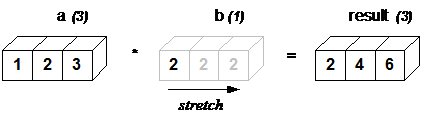)

A continuación vamos a ver ejemplos del uso y no de la técnica de broadcasting:

In [2]:
#Ejemplo 1 - Haremos una suma de dos listas de las mismas dimensiones sin la librería numpy

a = [1,2,3] # shape (1,3)
b = [6,6,6] # shape (1,3)
print(a+b)

[1, 2, 3, 6, 6, 6]


In [3]:
#Ejemplo 2 - Haremos una suma de dos listas de distintas dimensiones sin la librería numpy

a = [1,2,3] # shape (1,3)
b = 6       # escalar

try:
  print(a+b)
except:
  print('TypeError: can only concatenate list (not "int") to list')

TypeError: can only concatenate list (not "int") to list


In [4]:
#Ejemplo 3 - Haremos una suma de dos listas de las mismas dimensiones con la librería numpy
a = np.array([1,2,3])
b = np.array([6,6,6])
print(a+b)

[7 8 9]


In [5]:
#Ejemplo 4 - Haremos una suma de dos listas de distintas dimensiones con la librería numpy utilizando la técnica de broadcasting
a = np.array([1,2,3])
b = 6       
try:
  print(a+b)
except:
  print('TypeError: can only concatenate list (not "int") to list')

[7 8 9]


In [6]:
#Ejemplo 5 - Haremos una suma de dos matrices de distintas dimensiones con la librería numpy utilizando la técnica de broadcasting
A = np.ones((3,3))    # shape (3,3)
b = np.array([1,2,3]) # shape (1,3)
print(A+b)

[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


Conclusiones de los ejemplos dados:


*   Como podemos ver en el ejemplo 2, sin la librería de numpy Python no permite operaciones entre listas de distinto tamaño.
*   Numpy permite realizar operaciones entre arrays o matrices tanton si son del mismo tamaño como si tienen distintos tamaños (con algunas restricciones que veremos a continuación), aunque como veremos en el siguiente apartado en los ejemplos 4 y 5 se encuentra una gran ventaja en el ahorro de memoria al no necesitar almacenar más que únicamente un escalar.




####01.01.2 Reglas del broadcasting

La técnica de broadcasting tiene reglas especificas para la correcta transmisión de las matrices:


1.   Si las dos matrices tienen distintas dimensiones, la que tenga menor dimension se rellena de unos.
2.   Si las dos matrices tienen formas distintas aquella con dimensión 1 se "extiende" para coincidir con la otra.
3.   Si las dos matrices tienen distintas dimensiones, y ninguna de las matrices tiene alguna dimensión con tamaño 1 se generara un error.



Aunque luego se vayan a ver más ejemplos, vamos a mostrar dos ejemplos explicados sobre las reglas descritas anteriormente.

In [7]:
#Ejemplo de la regla 1 y 2
a = np.ones((2,3)) 
b = np.arange(3)
print("Dimensiones del array a ", a.shape)
print(f"Dimensiones del array b {b.shape} \n")

print("Teniendo en cuenta la regla 1 el array b se rellenaran con 1s quedando con dimensiones (1,3)\n")
print("Teniendo en cuenta la regla 2 los arrays tienen distintas dimensiones (2,3) , (1,3) \n como el array b tiene dimensión 1 se extiende para coincidir con la matriz a quedando con dimensiones (2,3)\n")

print("Ahora las dimensiones coinciden y se puede llevar a cabo la operación deseada")

c = a*b
print(c)
print("\nLas dimensiones de la matriz resultante podemos ver como es la obtenida al ajustar las dimensiones de las matrices ", c.shape)

Dimensiones del array a  (2, 3)
Dimensiones del array b (3,) 

Teniendo en cuenta la regla 1 el array b se rellenaran con 1s quedando con dimensiones (1,3)

Teniendo en cuenta la regla 2 los arrays tienen distintas dimensiones (2,3) , (1,3) 
 como el array b tiene dimensión 1 se extiende para coincidir con la matriz a quedando con dimensiones (2,3)

Ahora las dimensiones coinciden y se puede llevar a cabo la operación deseada
[[0. 1. 2.]
 [0. 1. 2.]]

Las dimensiones de la matriz resultante podemos ver como es la obtenida al ajustar las dimensiones de las matrices  (2, 3)


In [9]:
# Ejemplo regla 3
a = np.ones((2,3)) 
b = np.ones((4,2)) 
print("Dimensiones del array a ", a.shape)
print(f"Dimensiones del array b {b.shape} \n")
print("Como podemos observar las matrices tienen dimensiones diferentes y ninguna de las dos dispone de una dimension 1, por lo que al intentar relalizar una operación entre ellas se lanzara un error\n")
print(a+b)

Dimensiones del array a  (2, 3)
Dimensiones del array b (4, 2) 

Como podemos observar las matrices tienen dimensiones diferentes y ninguna de las dos dispone de una dimension 1, por lo que al intentar relalizar una operación entre ellas se lanzara un error



ValueError: ignored

####01.01.3 ¿Qué ventajas proporciona?

Esta estrategia consigue evitar las copias innecesarias de datos en memoria consiguiendo hacer algoritmos más eficientes. Esta ventaja se puede ver fácilmente en un ejemplo muy sencillo:

In [ ]:
# Ejemplo 1 - Sin usar Broadcasting.
array_a = np.array([1,2,3,4,5])
array_b = np.array([5,5,5,5,5])
print(f"Dimensiones del array_a {array_a.shape} , dimensiones del array_b {array_b.shape}")
print(f"Tamaño que ocupan en memoria ambas variables {sys.getsizeof(array_a) + sys.getsizeof(array_b)}")
array_a * array_b

In [ ]:
# Ejemplo 2 - Usando Broadcasting
array_a = np.array([1,2,3,4,5])
array_b = 5

print(f"Dimensiones del array_a {array_a.shape}")
print(f"Tamaño que ocupan en memoria ambas variables {sys.getsizeof(array_a) + sys.getsizeof(array_b)}")
array_a * array_b

En los ejemplos 1 y 2 podemos ver dos estrategias diferentes de multiplicación de numpy arrays, en el primer ejemplo vemos como al no usar la técnica de broadcasting almacenamos en memoria dos arrays de 5 elementos, en cambio en el ejemplo 2 beneficiandonos del uso de la técnica de broadcasting podemos realizar la misma operación únicamente almacenando un array y un entero ya que está se encarga de propagar la variable de menor dimensión (en este caso array_b que es un entero) sobre la variable de mayor dimension como vimos en el apartado de reglas.

####01.01.3 ¿Qué limitaciones presenta?

Aun con todas sus ventajas, existen restricciones en esta estrategia, ya que en ciertos casos el Broadcasting es una mala idea conduciendo a un uso ineficiente de la memoria ralentizando el cálculo.

Ejemplos de broadcasting con sus limitaciones:

In [ ]:
#Caso 1
a = np.arange(10).reshape(2,5)
b = np.ones((5))
c = a+b
print(c)
print("\nShape a" , a.shape)
print("Shape b" , b.shape)
print("Shape c" , c.shape)

In [ ]:
#Caso 2
a = np.arange(10).reshape(10,1)
b = np.ones((5)).reshape(1,5)
c = a+b
print(c)

print("\nShape a" , a.shape)
print("Shape b" , b.shape)
print("Shape c" , c.shape)

In [ ]:
#Limitación de caso 1
a = np.arange(10).reshape(2,5)
b = np.ones((6))
print(a+b)

In [ ]:
#Limitación de caso 2
a = np.arange(10).reshape(10,1)
b = np.ones((5)).reshape(5,1)
print(a+b)

###Actividad 01.02 - Verificar la eficacia y mejora posible de rendimiento del uso de dicha técnica sobre ndarrays de tamaños grandes.

El mapeo de memoria (*memory mapping*) es una técnica que tiene su mayor ventaja en acciones de E/S de ficheros, esta técnica se ayuda de la memoria virtual del sistema operativo para cargar directamente los datos en memoria consiguiendo el acceso directo a posiciones especificas sin falta de cargar todos los datos, ya que estos se encontran en disco pero la direcciones a estos estarán mapeadas en la memoria, evitando llamadas a sistema y cargas de bufferes intermedios.  

A continuación, mostraremos un ejemplo del rendimiento en lectura de ficheros usando dos estrategias, una de lectura y busqueda estandar de un fichero y otra usando la técnica de mapeo de memoria.

*Nota: Este ejemplo se hace con un total de 16 repeticiones para que en el gráfico resultante se aprecien las diferencias, aun así, se ha dejado la variable repes por si se quiere bajar o aumentar el número de iteraciones de este. (tiempo estimado de ejecución: 1min 14segs)*

In [ ]:
random.seed(0)
def crear_fichero(t):
  file = open("/content/file.txt", "w")
  for i in range(t+1):
    file.write("C++")
    if i == int(random.random()*t) : file.write("Python") 
  file.close()

In [ ]:
#Creación de estructuras de clases necesarias
repes = 16
tamaño = 1
tamaños = []
sin_mapeo = []
con_mapeo = []

#Prueba de lectura de datos con y sin mapeo
for i in range(repes):
  if i % 2 == 0: tamaño*=2 
  else: tamaño*=5

  tamaños.append(str(tamaño))
  crear_fichero(tamaño)
  
  #Ejemplo con lectura normal de fichero
  t_no_mmap_start_read = time() 
  with open("/content/file.txt", mode="r") as fbn:
    texto = fbn.read()
    texto.find("Python")
  t_no_mmap_start_end = time() 

  #Ejemplo usando memory mapping
  t_mmap_start_read = time() 
  with open("/content/file.txt", mode="r") as fbm:
    with mmap.mmap(fbm.fileno(), 0, access= mmap.ACCESS_READ) as mmap_o:
      mmap_o.find(b"Python")
  t_mmap_end_read = time()
  
  #Comparamos los resultados
  sin_mapeo.append(t_no_mmap_start_end - t_no_mmap_start_read)
  con_mapeo.append(t_mmap_end_read - t_mmap_start_read)
  print('Tamaño del fichero : {0}'.format(tamaño+1))
  print('Tiempo de lectura sin mapeo de memoria : {0}'.format(sin_mapeo[-1]))
  print('Tiempo de lectura con mapeo de memoria : {0}'.format(con_mapeo[-1]))

#Visualizamos los datos
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
print(tamaños)
axes_x = tamaños
plt.xticks(rotation=45)
ax.plot(axes_x, sin_mapeo, marker = '^', label='Sin mapeo de memoria')
ax.plot(axes_x, con_mapeo, marker = 'o', label='Con mapeo de memoria')
plt.title("\n Tiempo de lectura y busqueda con diferentes tamaños de fichero\n", loc="center", fontsize=18)
plt.legend(loc="best", prop={'size': 12})
plt.xlabel("\nTamaño del fichero (número de lineas)",fontsize=12)
plt.ylabel("Tiempo de ejecución (ms)\n",fontsize=12)
plt.show()

results = list(map(lambda x, y: x > y, sin_mapeo, con_mapeo))
if all(results) : print("La ejecución sin mapeo de memoria ha ocasionado una disminución de lectura para todos los tamaños de fichero")
else:
  print(f"El mapeo de memoria ha tardado menos tiempo de ejecución {sum(results)} de las {repes} repeticiones")

Como podemos observar a mayor tamaño de fichero mayor es la diferencia en el  tiempo de ejecución, diferenciandose cada vez más la mejoría usando la técnica de memory mapping. 

## **Artículo 02 - Data Structures for Statistical Computing in Python**

(https://www.researchgate.net/publication/265001241_Data_Structures_for_Statistical_Computing_in_Python)


Creen que hacia años benideros habrá una gran posibilidad de traer usuarios hacia python desde R.. Matlab.. 
Un grafico estaría guapo
Decir que desde que pandas se introdujo hace ya unos años
Tendencias actuales, uso que hace la gente
R pa que se usa cuales son sus fuertes frente a python
porque python se usa mas que el resto de herramientas
porque sql se usa para cosas determinadas y no otras
Matlab
Julia
Estados actual de herramientas de ciencias de datos en 2021
Empiezo de 0 en ciencia de datos y quiero ver que tecnologias estan disponibles
y quiero una pequeña comparación entre ellas

###**Actividad 02.01 - Desarrollar una opinión razonada del estado actual de las herramientas de análisis de datos estadísticos en contraposición a como se muestran en el artículo, R vs Python vs SQL vs Others...**

#### Introducción

La ciencia de datos es una de las disciplinas con más auge estos útimos años, existen multitud de lenguajes que pueden ser utilizados para este fin, actualmente algunos de los más utilizados son: Python, R, SQL, MATLAB y Julia. Iniciaremos diciendo las mayores ventajas y desventajas de cada uno para poder situarlos.

##### Python

Actualmente el lenguaje de progración más utilizado en el mundo. Su gran popularidad viene en parte gracias a su simplicidad siendo este muy fácil de aprender, además, cuenta de una amplia gama de módulos específicos, con paquetes muy sofisticados para aplicaciones de apredizaje automático así como un gran soporte comunitario gracias a su gran popularidad. 

##### R

Segundo lenguaje de programación más usado de los que vamos a mencionar. Entre sus fuertes tiene su gran poderío en visualización de datos y estadistica. Como Python, gracias a su popularidad R también cuenta con un gran apoyo de una comunidad muy activa y contribuyente. Dos de las desventajas que ocasionan que este por dentrás de Python en popularidad son su lentitud y su ligera desventaja en desarrollo de programas para producción o despliegue.

##### SQL

SQL es un lenguaje más util para el procesamiento de datos que como herramienta analítica avanzada, ya que fue un lenguaje diseñado para administrar, definir y consultar bases de datos relacionales. Su mayor desventaja es las pocas capacidades analíticas que tiene.

##### MATLAB

 MATLAB es el lenguaje de programación por excelencia en el mundo académico, también es muy utilizado en la industria. Este lenguaje fue diseñado para computación numerica por lo que es adecuado para aplicaciones cuantitativas con requisitos matemáticos sofistacados. Dentro de sus fuertes al igual que R también se en cuentra la visualización de datos. 

##### Julia

Julia es el lenguaje de programación más reciente de los mencionados anteriormente, lo que también hace que no tenga una gran comunidad de apoyo detrás y disponga de paquetes limitados. Aun así, es un lenguaje de programación muy interesante siendo un lenguaje compilado JIT (Just In Time) que le ofrece ventajas que tienen los lenguajes interpretados como Python asi como obtener un gran rendimiento. Este lenguaje fue diseñado especificamente para el análisis numérico, aunque también ofrece la posibilidad de programación de propósitos generales.

##### Conclusión


Existen muchos lenguajes de programación para ciencia de datos, todos tienen sus peculiaridades, algunos están diseñados para desarrollos especificos y otros tienen un carácter más general.
En el articulo opinan que en los proximos años muchas de las personas que actualmente usan R se pasarán a Pyhton

In [10]:
popularity = pd.read_csv("/content/Popularity.csv")
popularity.head()
popularity["Date"] = pd.to_datetime(popularity["Date"])
columns = ["Date","Python","R"]
popularity[columns]

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
axes_x = range(repes)
ax.plot(popularity["Date"], popularity["Python"], label='Python')
ax.plot(popularity["Date"], popularity["R"], label='R')
plt.title("\n Popularidad de Python y R desde 2004 hasta 2021\n", loc="center", fontsize=18)
plt.legend(loc="best", prop={'size': 12})
plt.xlabel("\nAño",fontsize=12)
plt.ylabel("Porcentaje de popularidad\n",fontsize=12)
plt.show()

OutOfBoundsDatetime: ignored